In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def k_means_clustering(dataset, k):
    # Store the Species column separately
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)
    
    # Convert dataset to numpy array
    x = dataset.values
    
    # Randomly initialize centroids
    np.random.seed(42)  # For reproducibility
    centroids = x[np.random.choice(range(len(x)), size=k, replace=False)]
    
    # Initialize cluster labels and distances
    labels = np.zeros(len(x))
    distances = np.zeros((len(x), k))
    
    # Iterate until convergence
    while True:
        # Calculate distances to centroids
        for i in range(k):
            distances[:, i] = np.linalg.norm(x - centroids[i], axis=1)
        
        # Assign data points to clusters
        new_labels = np.argmin(distances, axis=1)
        
        # Check for convergence
        if np.array_equal(labels, new_labels):
            break
        
        # Update centroids
        for i in range(k):
            centroids[i] = np.mean(x[new_labels == i], axis=0)
        
        labels = new_labels
    
    return labels, species

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [5]:
iris = datasets.load_iris()

In [6]:
X = iris.data
y = iris.target
X.shape

(150, 4)

In [7]:
y.shape

(150,)

In [8]:
pca = PCA(n_components = 3)

In [9]:
A = pca.fit_transform(X)
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [10]:
variance=pca.explained_variance_ratio_
variance

array([0.92461872, 0.05306648, 0.01710261])

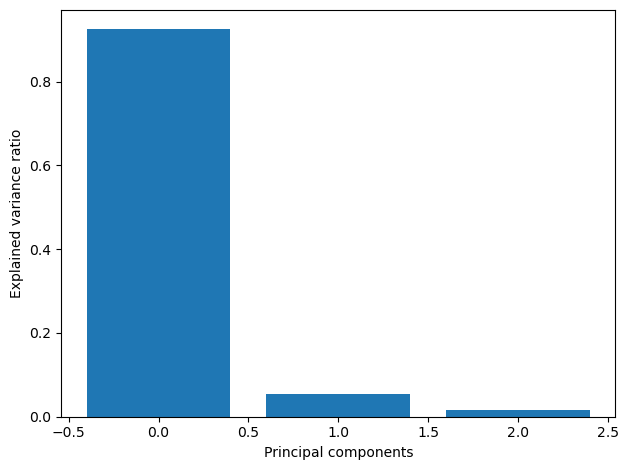

In [11]:
plt.bar(range(3),variance)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.tight_layout()
plt.show()

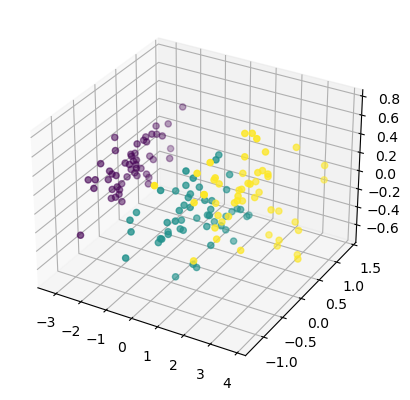

In [12]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection ="3d")
ax.scatter3D(A[:,0],A[:,1],A[:,2],c = y)

In [13]:
# Load the Iris dataset
dataset = pd.read_csv('C:\\Users\\Admin\\Desktop\\IIT Delhi\\K means and PCA\\Iris Dataset.csv')

print(dataset)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [14]:
x = dataset.iloc[:, [0, 1, 2, 3]].values

In [15]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wi_cl_su_sq = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wi_cl_su_sq.append(kmeans.inertia_)

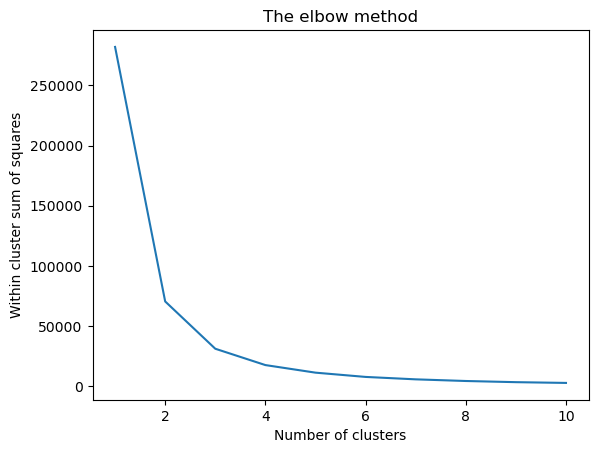

In [17]:
plt.plot(range(1, 11), wi_cl_su_sq)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') 
plt.show()

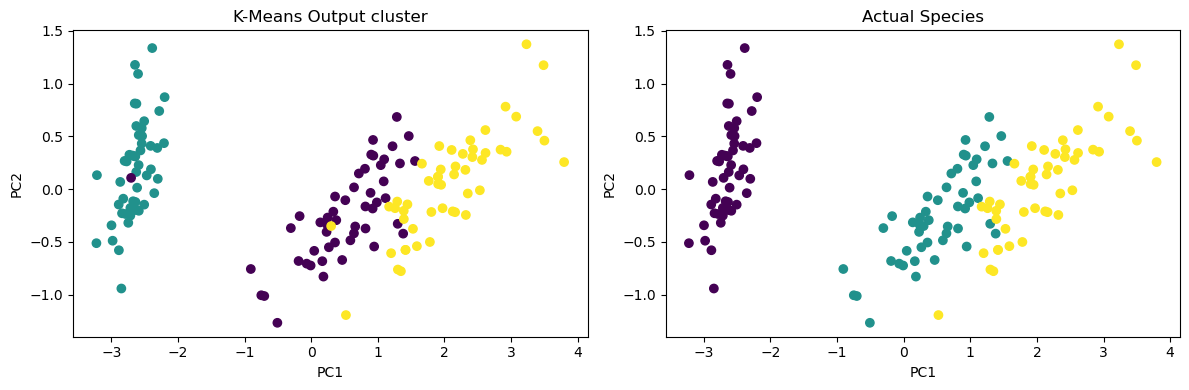

In [18]:
# Perform K-Means Clustering
k = 3  # Number of clusters
cluster_labels, species = k_means_clustering(dataset, k)


# Plot K-Means Clustering results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot cluster output
axes[0].scatter(A[:, 0], A[:, 1], c=cluster_labels)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('K-Means Output cluster')


# Plot actual species
species_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
species_labels = np.array([species_dict[s] for s in species])
axes[1].scatter(A[:, 0], A[:, 1], c=species_labels)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Actual Species')

plt.tight_layout()
plt.show()